# Detecting protest events on my data

In [1]:
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [2]:
from protest_impact.data.protests.detection import load_glpn_dataset

glpn = load_glpn_dataset()
glpn = glpn.rename_column("excerpt", "text")

Using custom data configuration default-f51db96809899829


Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/workspace/protest-impact-data/.venv/lib/python3.10/site-packages/datasets/download/streaming_download_manager.py:776: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Generating dev split: 0 examples [00:00, ? examples/s]

/workspace/protest-impact-data/.venv/lib/python3.10/site-packages/datasets/download/streaming_download_manager.py:776: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/workspace/protest-impact-data/.venv/lib/python3.10/site-packages/datasets/download/streaming_download_manager.py:776: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Generating test.time split: 0 examples [00:00, ? examples/s]

/workspace/protest-impact-data/.venv/lib/python3.10/site-packages/datasets/download/streaming_download_manager.py:776: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Generating test.loc split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-f51db96809899829/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


/workspace/protest-impact-data/.venv/lib/python3.10/site-packages/datasets/download/streaming_download_manager.py:776: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


  0%|          | 0/5 [00:00<?, ?it/s]

Casting the dataset:   0%|          | 0/2 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

In [3]:
from protest_impact.data.protests.detection import load_aglpn_dataset

protest_news = load_aglpn_dataset()
protest_news, protest_news["train"].features

Using custom data configuration protest-60bc4fa7cc59e7ca


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating main split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/protest-60bc4fa7cc59e7ca/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1150 [00:00<?, ?ex/s]

(DatasetDict({
     train: Dataset({
         features: ['text', 'meta', '_input_hash', '_task_hash', 'spans', 'options', 'accept', '_view_id', 'config', 'answer', '_timestamp', 'label'],
         num_rows: 575
     })
     dev: Dataset({
         features: ['text', 'meta', '_input_hash', '_task_hash', 'spans', 'options', 'accept', '_view_id', 'config', 'answer', '_timestamp', 'label'],
         num_rows: 115
     })
     test: Dataset({
         features: ['text', 'meta', '_input_hash', '_task_hash', 'spans', 'options', 'accept', '_view_id', 'config', 'answer', '_timestamp', 'label'],
         num_rows: 460
     })
 }),
 {'text': Value(dtype='string', id=None),
  'meta': {'date': Value(dtype='string', id=None),
   'title': Value(dtype='string', id=None),
   'url': Value(dtype='string', id=None),
   'homepage': Value(dtype='string', id=None),
   'crawl_engine': Value(dtype='string', id=None),
   'crawl_query': Value(dtype='string', id=None),
   'pattern': Value(dtype='string', id=None)

In [4]:
len(glpn["train"]), len(protest_news["train"])

(1914, 575)

In [7]:
from protest_impact.data.news import kwic_dataset

protest_news = kwic_dataset(protest_news, n=2)

  0%|          | 0/575 [00:00<?, ?ex/s]

  0%|          | 0/115 [00:00<?, ?ex/s]

  0%|          | 0/460 [00:00<?, ?ex/s]

In [8]:
if device == "cpu":
    n = 20
    glpn["train"] = glpn["train"].shuffle(seed=20230206).select(range(n))
    glpn["dev"] = glpn["dev"].shuffle(seed=20230206).select(range(n))
    glpn["test"] = glpn["test"].shuffle(seed=20230206).select(range(n))
    glpn["test.time"] = glpn["test.time"].shuffle(seed=20230206).select(range(n))
    glpn["test.loc"] = glpn["test.loc"].shuffle(seed=20230206).select(range(n))

    protest_news["train"] = (
        protest_news["train"].shuffle(seed=20230206).select(range(n))
    )
    protest_news["dev"] = protest_news["dev"].shuffle(seed=20230206).select(range(n))
    protest_news["test"] = protest_news["test"].shuffle(seed=20230206).select(range(n))

In [9]:
import evaluate
import numpy as np

metric = evaluate.load("f1")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [10]:
from pathlib import Path

from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments,
)


def train_model(model, tokenizer, description, dataset):
    model_location = Path("models") / description / "model"

    if model_location.exists():
        return AutoModelForSequenceClassification.from_pretrained(model_location)

    def tokenize_function(examples):
        return tokenizer(
            examples["text"], padding="max_length", truncation=True, max_length=512
        )

    tokenized_datasets = dataset.map(tokenize_function, batched=True)
    training_args = TrainingArguments(
        output_dir=model_location.parent / "checkpoints",
        evaluation_strategy="epoch",
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        lr_scheduler_type="linear",
        warmup_ratio=0.1,
        learning_rate=5e-6,
        weight_decay=0.2,
        num_train_epochs=6,
        fp16=True,
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["dev"],
        compute_metrics=compute_metrics,
    )
    trainer.train()
    trainer.save_model(model_location)
    return model

In [11]:
# model_name = "deepset/gelectra-base"
model_name = "deepset/gelectra-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_vanilla = AutoModelForSequenceClassification.from_pretrained(model_name).to(
    device
)

Some weights of the model checkpoint at deepset/gelectra-large were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at deepset/gelectra-large and are newly initialized: ['classifier.out_proj.weight', 'clas

In [12]:
model_glpn = train_model(
    model_vanilla, tokenizer, f"{model_name.replace('/', '-')}-glpn", glpn
)

In [13]:
from evaluate import TextClassificationEvaluator


def evaluate(model, tokenizer, test_set):
    eval_results = TextClassificationEvaluator().compute(
        model_or_pipeline=model,
        data=test_set,
        input_column="text",
        label_column="label",
        label_mapping={"LABEL_0": 0, "LABEL_1": 1},
        tokenizer=tokenizer,
        metric=metric,
    )
    return eval_results

In [52]:
from sklearn.metrics import classification_report
from transformers import pipeline


def evaluate_detail(model, tokenizer, test_set):
    classifier = pipeline(
        "text-classification",
        model=model,
        tokenizer=tokenizer,
        device=device,
        padding="max_length",
        truncation=True,
        max_length=512,
    )
    predictions = list(classifier(a["text"] for a in test_set))
    y_pred = [int(a["label"][-1]) for a in predictions]
    y_true = [a["label"] for a in test_set]
    print(sum(y_true) / len(y_true))
    print(sum(y_pred) / len(y_pred))
    print(classification_report(y_true, y_pred))
    return predictions, y_pred, y_true

In [15]:
evaluate(model_glpn, tokenizer, glpn["test"])

{'f1': 0.9375,
 'total_time_in_seconds': 10.426991879940033,
 'samples_per_second': 52.460000573352886,
 'latency_in_seconds': 0.019062142376490007}

In [53]:
predictions, y_pred, y_true = evaluate_detail(model_glpn, tokenizer, glpn["test"])

0.603290676416819
0.3656307129798903
              precision    recall  f1-score   support

           0       0.62      0.99      0.76       217
           1       0.99      0.60      0.75       330

    accuracy                           0.76       547
   macro avg       0.80      0.80      0.75       547
weighted avg       0.84      0.76      0.75       547



In [54]:
len(list(predictions)), len(y_pred), len(y_true)

(547, 547, 547)

<AxesSubplot: xlabel='bin'>

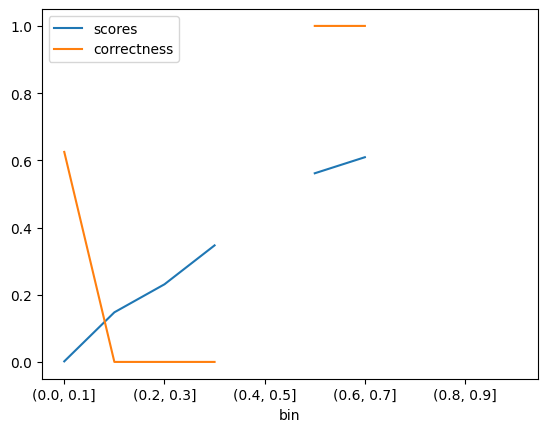

In [57]:
# plot scores vs percentage of correct predictions for each bin of scores (0-0.1, 0.1-0.2, etc)
import matplotlib.pyplot as plt
import pandas as pd

scores_ = [
    (1 - a["score"] if a["label"] == "LABEL_0" else a["score"]) for a in predictions
]
correctness = [ypred == ytrue for ypred, ytrue in zip(y_pred, y_true)]
df = pd.DataFrame({"scores": scores_, "correctness": correctness})
df["bin"] = pd.cut(df["scores"], np.arange(0, 1.1, 0.1))
df.groupby("bin").mean().plot()

(array([336.,   5.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   3.,   0.,   2., 189.]),
 array([2.87950039e-04, 2.02710581e-02, 4.02541661e-02, 6.02372742e-02,
        8.02203822e-02, 1.00203490e-01, 1.20186598e-01, 1.40169706e-01,
        1.60152814e-01, 1.80135922e-01, 2.00119030e-01, 2.20102139e-01,
        2.40085247e-01, 2.60068355e-01, 2.80051463e-01, 3.00034571e-01,
        3.20017679e-01, 3.40000787e-01, 3.59983895e-01, 3.79967003e-01,
        3.99950111e-01, 4.19933219e-01, 4.39916327e-01, 4.59899435e-01,
        4.79882543e-01, 4.99865651e-01, 5.19848759e-01, 5.39831867e-01,
        5.59814975e-01, 5.79798083e-01, 5.99781191e-01, 6.19764299e-01,
        6.39747407e-01, 6.59730515e-01, 6.79713624e-01, 6.99696732e-01,
        7.

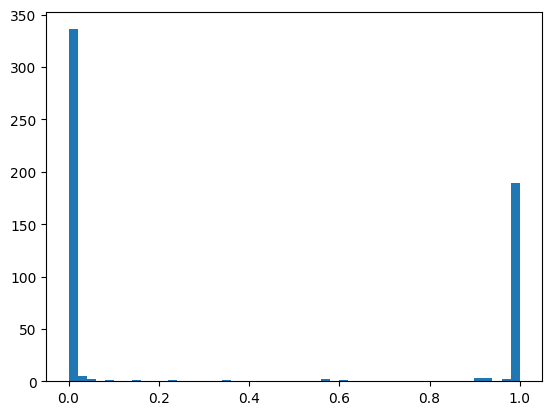

In [60]:
# plot histogram of scores
plt.hist(scores_, bins=50)

In [17]:
evaluate(model_glpn, tokenizer, protest_news["test"])

{'f1': 0.5754716981132075,
 'total_time_in_seconds': 7.725580420345068,
 'samples_per_second': 59.54245182518646,
 'latency_in_seconds': 0.016794740044228408}

In [18]:
evaluate_detail(model_glpn, tokenizer, protest_news["test"])

0.13260869565217392
0.3282608695652174
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       399
           1       0.40      1.00      0.58        61

    accuracy                           0.80       460
   macro avg       0.70      0.89      0.72       460
weighted avg       0.92      0.80      0.83       460



In [19]:
model_protest_news = train_model(
    model_vanilla,
    tokenizer,
    f"{model_name.replace('/', '-')}-protest-news",
    protest_news,
)

In [20]:
evaluate(model_protest_news, tokenizer, protest_news["test"])

{'f1': 0.7555555555555555,
 'total_time_in_seconds': 7.7304750718176365,
 'samples_per_second': 59.504751742487926,
 'latency_in_seconds': 0.016805380590907908}

In [21]:
evaluate_detail(model_protest_news, tokenizer, protest_news["test"])

0.13260869565217392
0.1608695652173913
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       399
           1       0.69      0.84      0.76        61

    accuracy                           0.93       460
   macro avg       0.83      0.89      0.86       460
weighted avg       0.94      0.93      0.93       460



In [22]:
model_glpn_protest_news = train_model(
    model_glpn,
    tokenizer,
    f"{model_name.replace('/', '-')}-glpn-protest-news",
    protest_news,
)

Epoch,Training Loss,Validation Loss,F1
1,No log,0.457833,0.622222
2,No log,0.316349,0.750000
3,No log,0.438287,0.700000
4,0.301200,0.367638,0.800000
5,0.301200,0.365912,0.800000
6,0.301200,0.382221,0.800000


In [23]:
evaluate(model_glpn_protest_news, tokenizer, protest_news["test"])

{'f1': 0.7555555555555555,
 'total_time_in_seconds': 7.80452018044889,
 'samples_per_second': 58.94020251909225,
 'latency_in_seconds': 0.016966348218367153}

In [24]:
evaluate_detail(model_protest_news, tokenizer, protest_news["test"])

0.13260869565217392
0.1608695652173913
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       399
           1       0.69      0.84      0.76        61

    accuracy                           0.93       460
   macro avg       0.83      0.89      0.86       460
weighted avg       0.94      0.93      0.93       460



Make predictions for annotating more relevant articles:

In [26]:
import json

from protest_impact.util import project_root

with open(project_root / "protest_news_shuffled_v2_sample.jsonl") as f:
    sample = [json.loads(line) for line in f]

In [41]:
from tqdm.notebook import tqdm

texts = [
    x["meta"]["title"] + "\n\n" + kwic("\n".join(list(x["text"].split("\n"))[1:]), n=2)
    for x in tqdm(sample)
]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [42]:
classifier = pipeline(
    "text-classification",
    model=model_protest_news,
    tokenizer=tokenizer,
    device=device,
    padding="max_length",
    truncation=True,
    max_length=512,
)

predictions = classifier(texts)

In [43]:
sample_with_predictions = [
    {**a, "label": int(b["label"][-1]), "score": b["score"]}
    for a, b in zip(sample, predictions)
]

with open(
    project_root / "protest_news_shuffled_v2_sample_with_predictions.jsonl", "w"
) as f:
    for a in sample_with_predictions:
        f.write(json.dumps(a) + "\n")